In [2]:
#Install required packages
!pip install pandas matplotlib seaborn plotly --quiet

In [8]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Make plots look nicer
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Step 2: Load CSV files
timeline_df = pd.read_csv("/content/multiTimeline (1).csv")
geo_df = pd.read_csv("/content/geoMap (1).csv")

# Step 3: Explore Data
print("Timeline CSV Preview:")
print(timeline_df.head())

print("\nGeo CSV Preview:")
print(geo_df.head())

Timeline CSV Preview:
                                                                                    Category: Computers & Electronics
Week       Data Science: (India) Artificial Intelligence: (India) Robotics: (India)                  ChatGPT: (India)
2020-10-18 1                     <1                               <1                                                0
2020-10-25 1                     <1                               <1                                                0
2020-11-01 1                     <1                               <1                                                0
2020-11-08 1                     <1                               <1                                                0

Geo CSV Preview:
                                                                                                                                  Category: Computers & Electronics
Region         Data Science: (10/21/20 - 10/21/25) Artificial Intelligence: (10/21/20 - 

In [13]:
# Step 4: Clean & Format Timeline Data

# 1. Read CSV and skip the first row (Category)
timeline_df = pd.read_csv("/content/multiTimeline (1).csv", skiprows=1)

# 2. Strip column names
timeline_df.columns = timeline_df.columns.str.strip()

# 3. Rename first column to 'Week'
timeline_df.rename(columns={timeline_df.columns[0]: 'Week'}, inplace=True)

# 4. Convert 'Week' column to datetime
timeline_df['Week'] = pd.to_datetime(timeline_df['Week'], errors='coerce')

# 5. Drop rows with invalid dates
timeline_df = timeline_df.dropna(subset=['Week'])

# 6. Convert keyword columns to numeric, handle '<1' values
keyword_cols = [col for col in timeline_df.columns if col != 'Week']
for col in keyword_cols:
    timeline_df[col] = timeline_df[col].replace('<1', 0.5)  # optional: replace <1 with 0.5
    timeline_df[col] = pd.to_numeric(timeline_df[col], errors='coerce').fillna(0)

# 7. Verify cleaned data
print(timeline_df.head())
print("Columns:", timeline_df.columns.tolist())


        Week  Data Science: (India)  Artificial Intelligence: (India)  \
0 2020-10-18                      1                               0.5   
1 2020-10-25                      1                               0.5   
2 2020-11-01                      1                               0.5   
3 2020-11-08                      1                               0.5   
4 2020-11-15                      1                               0.5   

   Robotics: (India)  ChatGPT: (India)  
0                0.5               0.0  
1                0.5               0.0  
2                0.5               0.0  
3                0.5               0.0  
4                0.5               0.0  
Columns: ['Week', 'Data Science: (India)', 'Artificial Intelligence: (India)', 'Robotics: (India)', 'ChatGPT: (India)']


/tmp/ipython-input-1812566551.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  timeline_df[col] = timeline_df[col].replace('<1', 0.5)  # optional: replace <1 with 0.5


In [15]:
# Step 5: EDA - Popular Keywords
keyword_cols = [col for col in timeline_df.columns if col != 'Week']
avg_popularity = timeline_df[keyword_cols].mean().sort_values(ascending=False)
print("\nAverage popularity per keyword:")
print(avg_popularity)



Average popularity per keyword:
ChatGPT: (India)                    20.471374
Data Science: (India)                1.026718
Artificial Intelligence: (India)     0.862595
Robotics: (India)                    0.500000
dtype: float64


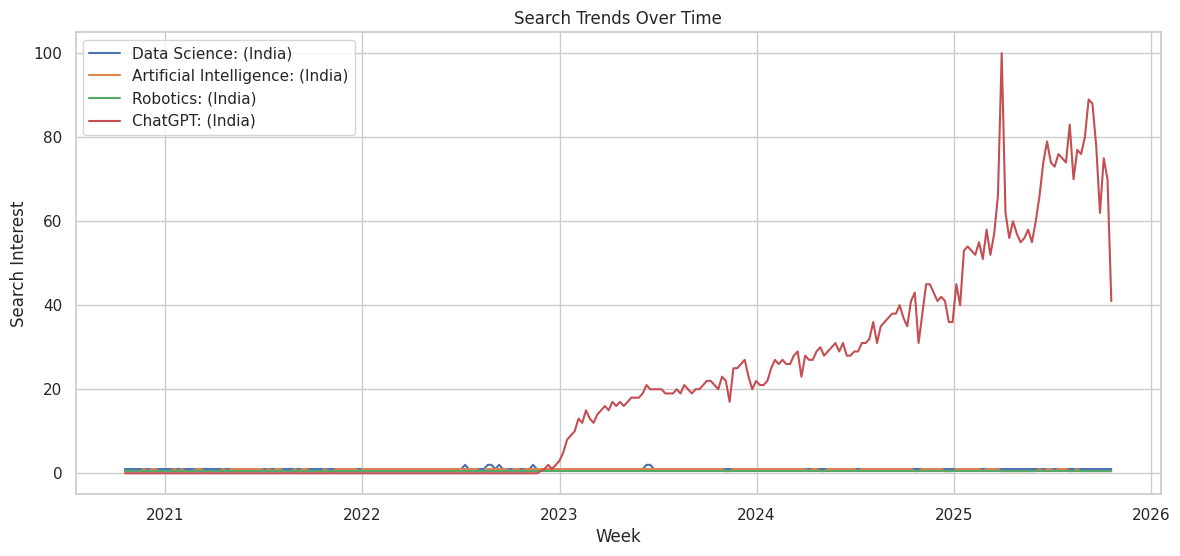

In [24]:
plt.figure(figsize=(14,6))
for col in keyword_cols:
    plt.plot(timeline_df['Week'], timeline_df[col], label=col)
plt.title("Search Trends Over Time")
plt.xlabel("Week")
plt.ylabel("Search Interest")
plt.legend()
plt.show()


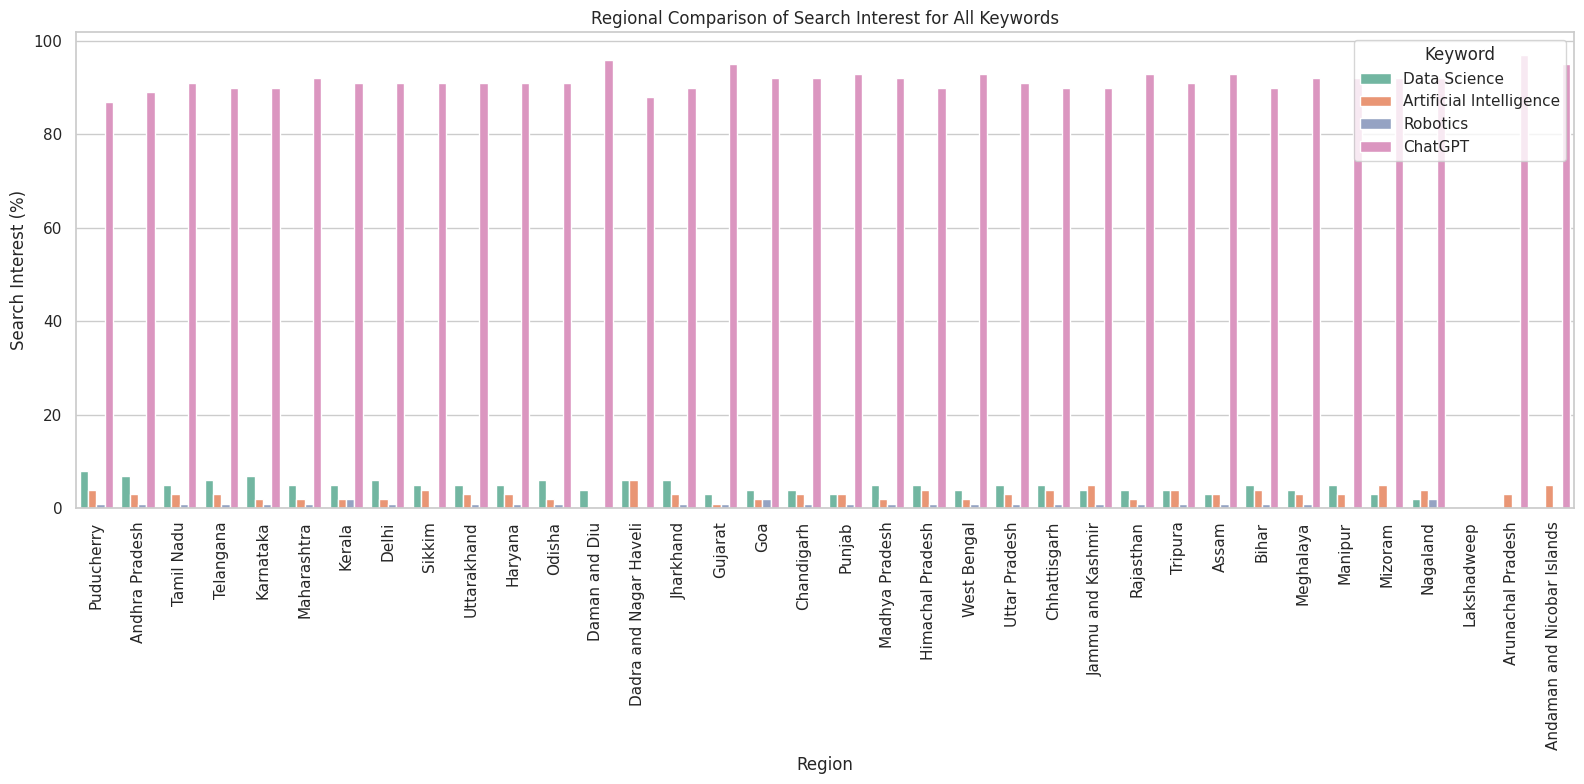

In [33]:
# Step 3: Plot bar chart
plt.figure(figsize=(16,8))
sns.barplot(x='Region', y='Search Interest', hue='Keyword', data=geo_melted, palette='Set2')
plt.xticks(rotation=90)
plt.title("Regional Comparison of Search Interest for All Keywords")
plt.xlabel("Region")
plt.ylabel("Search Interest (%)")
plt.legend(title='Keyword')
plt.tight_layout()
plt.show()

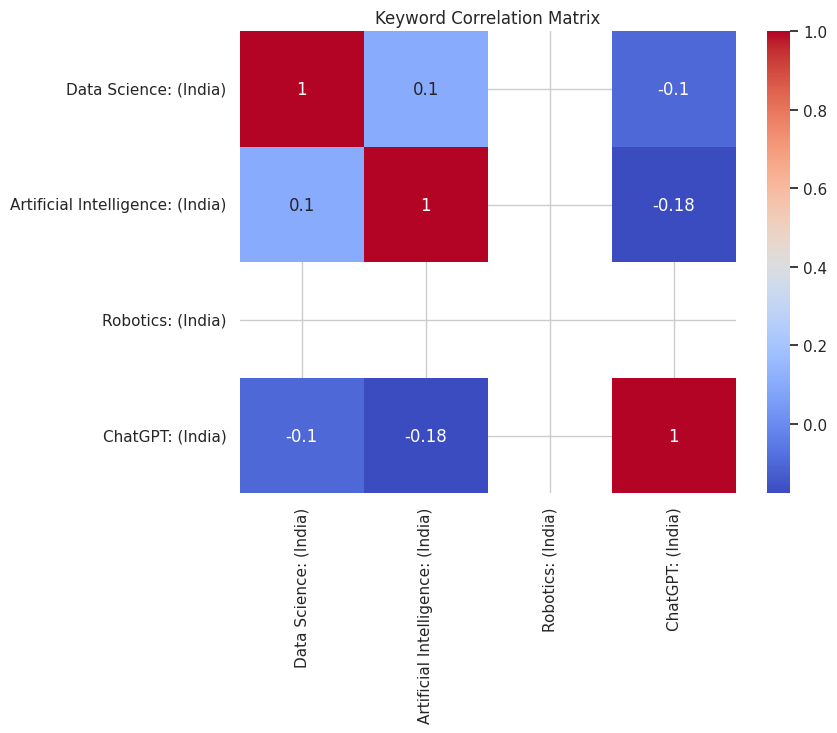

In [18]:
# Step 8: Correlation Matrix
corr_matrix = timeline_df[keyword_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Keyword Correlation Matrix")
plt.show()

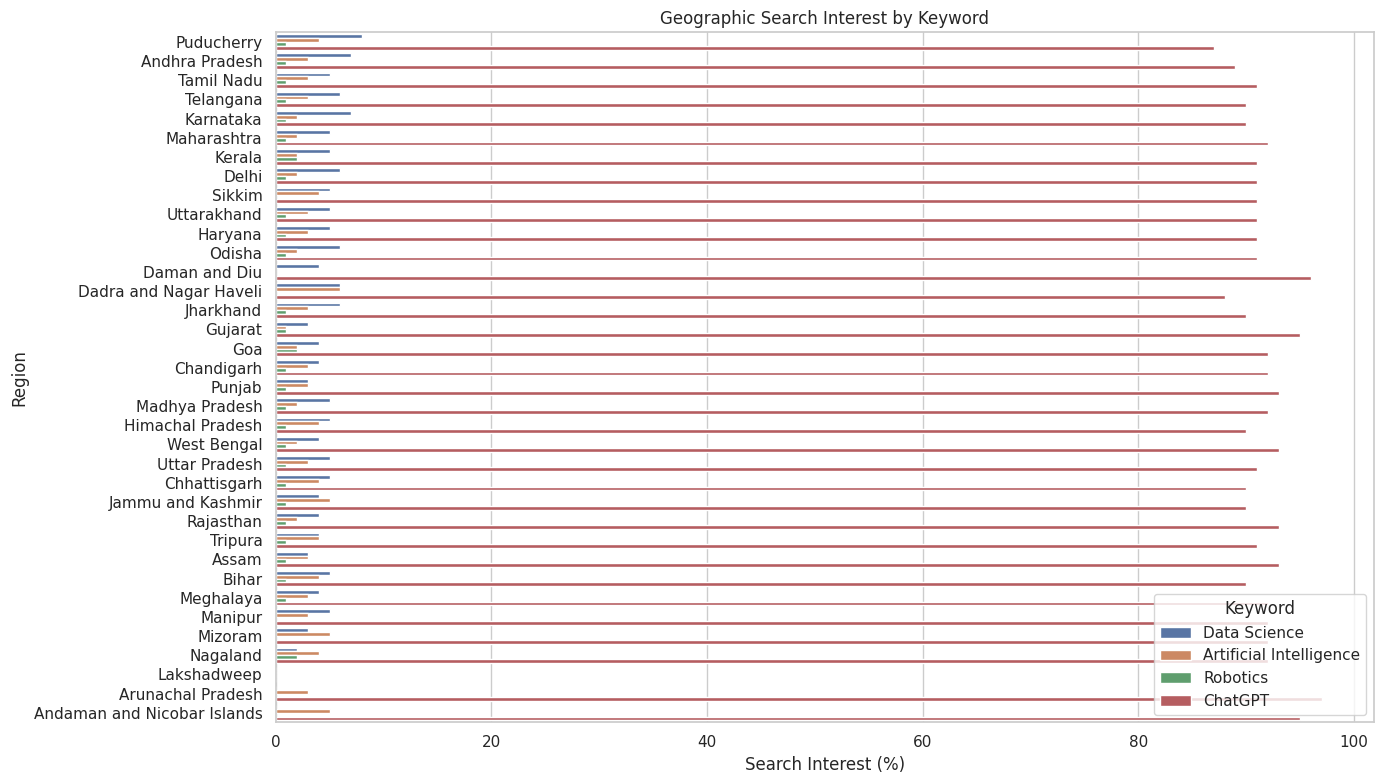

In [20]:
# Step 9: Geo Analysis
# Remove the first row which is an extra header
geo_df = pd.read_csv("/content/geoMap (1).csv", skiprows=1)

# Rename the first column to 'Region'
geo_df.rename(columns={geo_df.columns[0]: 'Region'}, inplace=True)

# Clean column names - remove extra spaces and date ranges
geo_df.columns = geo_df.columns.str.replace(r': \(.*\)', '', regex=True).str.strip()

# Identify keyword columns
keyword_cols_geo = [col for col in geo_df.columns if col != 'Region']

# Convert percentage strings to numeric
for col in keyword_cols_geo:
    geo_df[col] = geo_df[col].str.replace('%', '', regex=False)
    geo_df[col] = pd.to_numeric(geo_df[col], errors='coerce').fillna(0)

# Melt the dataframe for easier plotting
geo_melted = geo_df.melt(id_vars=['Region'], value_vars=keyword_cols_geo, var_name='Keyword', value_name='Search Interest')

# Example: Compare one keyword across regions using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Search Interest', y='Region', hue='Keyword', data=geo_melted)
plt.title("Geographic Search Interest by Keyword")
plt.xlabel("Search Interest (%)")
plt.ylabel("Region")
plt.legend(title="Keyword")
plt.tight_layout()
plt.show()

# Note: Plotting on a world map requires country names, but this data is for regions within India.
# A bar plot is more appropriate for visualizing regional differences within a country.


Spikes detected for Data Science: (India):
          Week  Data Science: (India)  diff
90  2022-07-10                      2   1.0
96  2022-08-21                      2   1.0
99  2022-09-11                      2   1.0
108 2022-11-13                      2   1.0
138 2023-06-11                      2   1.0

Spikes detected for Artificial Intelligence: (India):
          Week  Artificial Intelligence: (India)  diff
5   2020-11-22                               1.0   0.5
7   2020-12-06                               1.0   0.5
13  2021-01-17                               1.0   0.5
15  2021-01-31                               1.0   0.5
19  2021-02-28                               1.0   0.5
26  2021-04-18                               1.0   0.5
28  2021-05-02                               1.0   0.5
38  2021-07-11                               1.0   0.5
40  2021-07-25                               1.0   0.5
45  2021-08-29                               1.0   0.5
47  2021-09-12                  

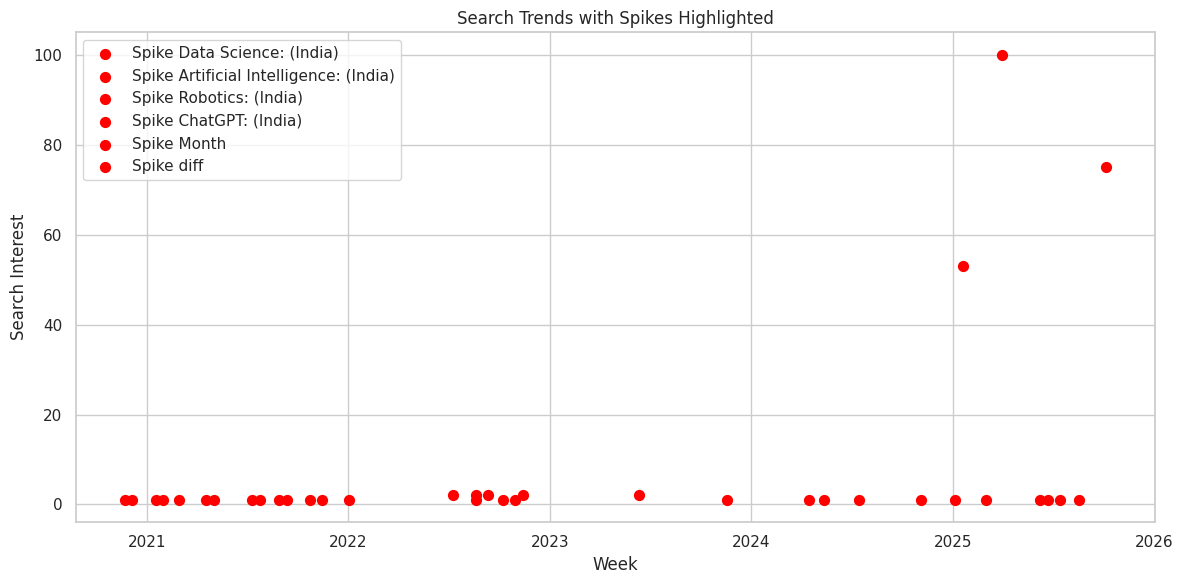

In [34]:
# Step 10: Detect Spikes (optional)
for col in keyword_cols:
    timeline_df['diff'] = timeline_df[col].diff()
    spikes = timeline_df[timeline_df['diff'] > timeline_df['diff'].mean() + 2*timeline_df['diff'].std()]
    print(f"\nSpikes detected for {col}:")
    print(spikes[['Week', col, 'diff']])

        # Annotate spikes
    plt.scatter(spikes['Week'], spikes[col], color='red', s=50, label=f"Spike {col}")

plt.title("Search Trends with Spikes Highlighted")
plt.xlabel("Week")
plt.ylabel("Search Interest")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Step 11: Insights Reporting
top_keywords = avg_popularity.head(5)
print("\nTop-performing keywords globally:")
print(top_keywords)


Top-performing keywords globally:
ChatGPT: (India)                    20.471374
Data Science: (India)                1.026718
Artificial Intelligence: (India)     0.862595
Robotics: (India)                    0.500000
dtype: float64


In [23]:
# Emerging / declining trends
trends = (timeline_df[keyword_cols].iloc[-1] - timeline_df[keyword_cols].iloc[0]).sort_values(ascending=False)
print("\nEmerging / declining trends:")
print(trends)


Emerging / declining trends:
ChatGPT: (India)                    41.0
Data Science: (India)                0.0
Artificial Intelligence: (India)     0.0
Robotics: (India)                    0.0
dtype: float64
